In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('AQI_Data.csv')

<Axes: >

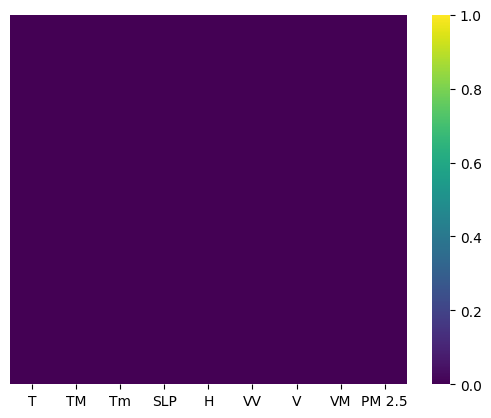

In [3]:
#Check for null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=True,cmap = 'viridis')

In [4]:
df=df.dropna()

In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [6]:
X=df.iloc[:,:-1]#independent features
Y=df.iloc[:,-1]#dependent features

Check for null values

In [7]:
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1088,False,False,False,False,False,False,False,False
1089,False,False,False,False,False,False,False,False
1090,False,False,False,False,False,False,False,False
1091,False,False,False,False,False,False,False,False


In [8]:
Y.isnull()

,PM 2.5
0,False
1,False
2,False
3,False
4,False
...,...
1088,False
1089,False
1090,False
1091,False


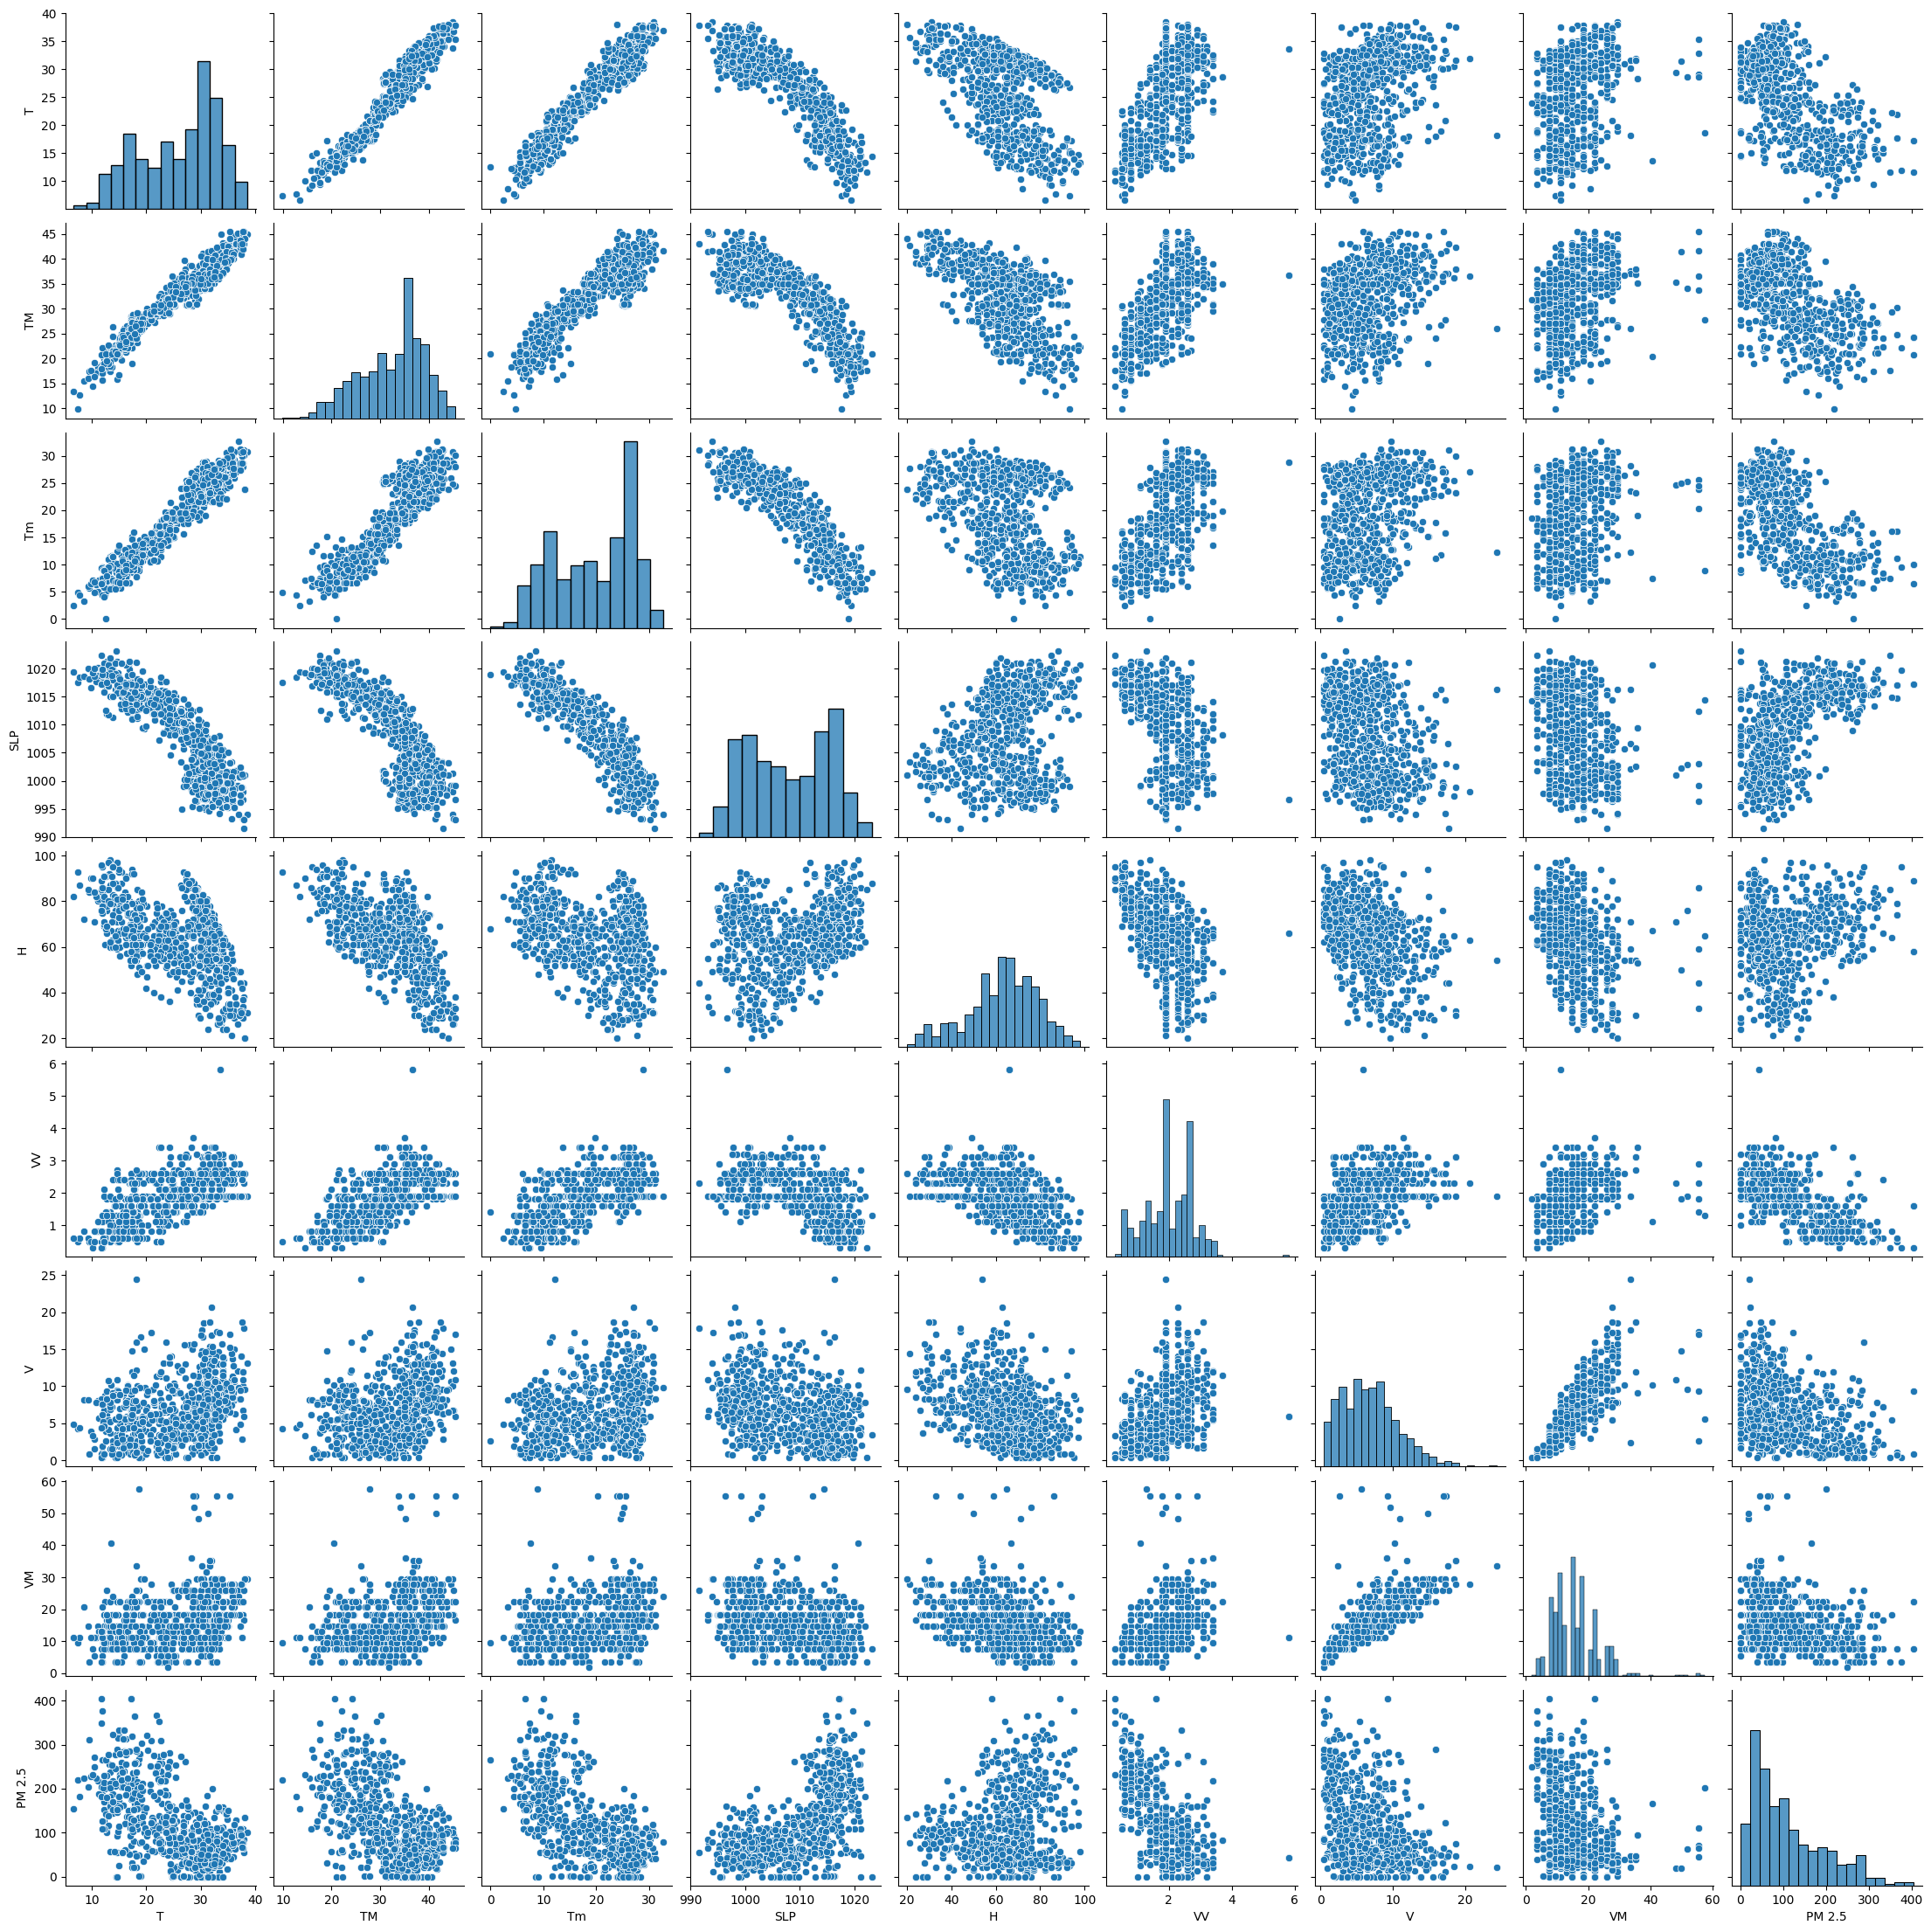

In [9]:
sns.pairplot(df)

In [10]:
df.corr()#negative co-relation with T,TM,Tm, W,V,VM and positive co-relation with SLP,H

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


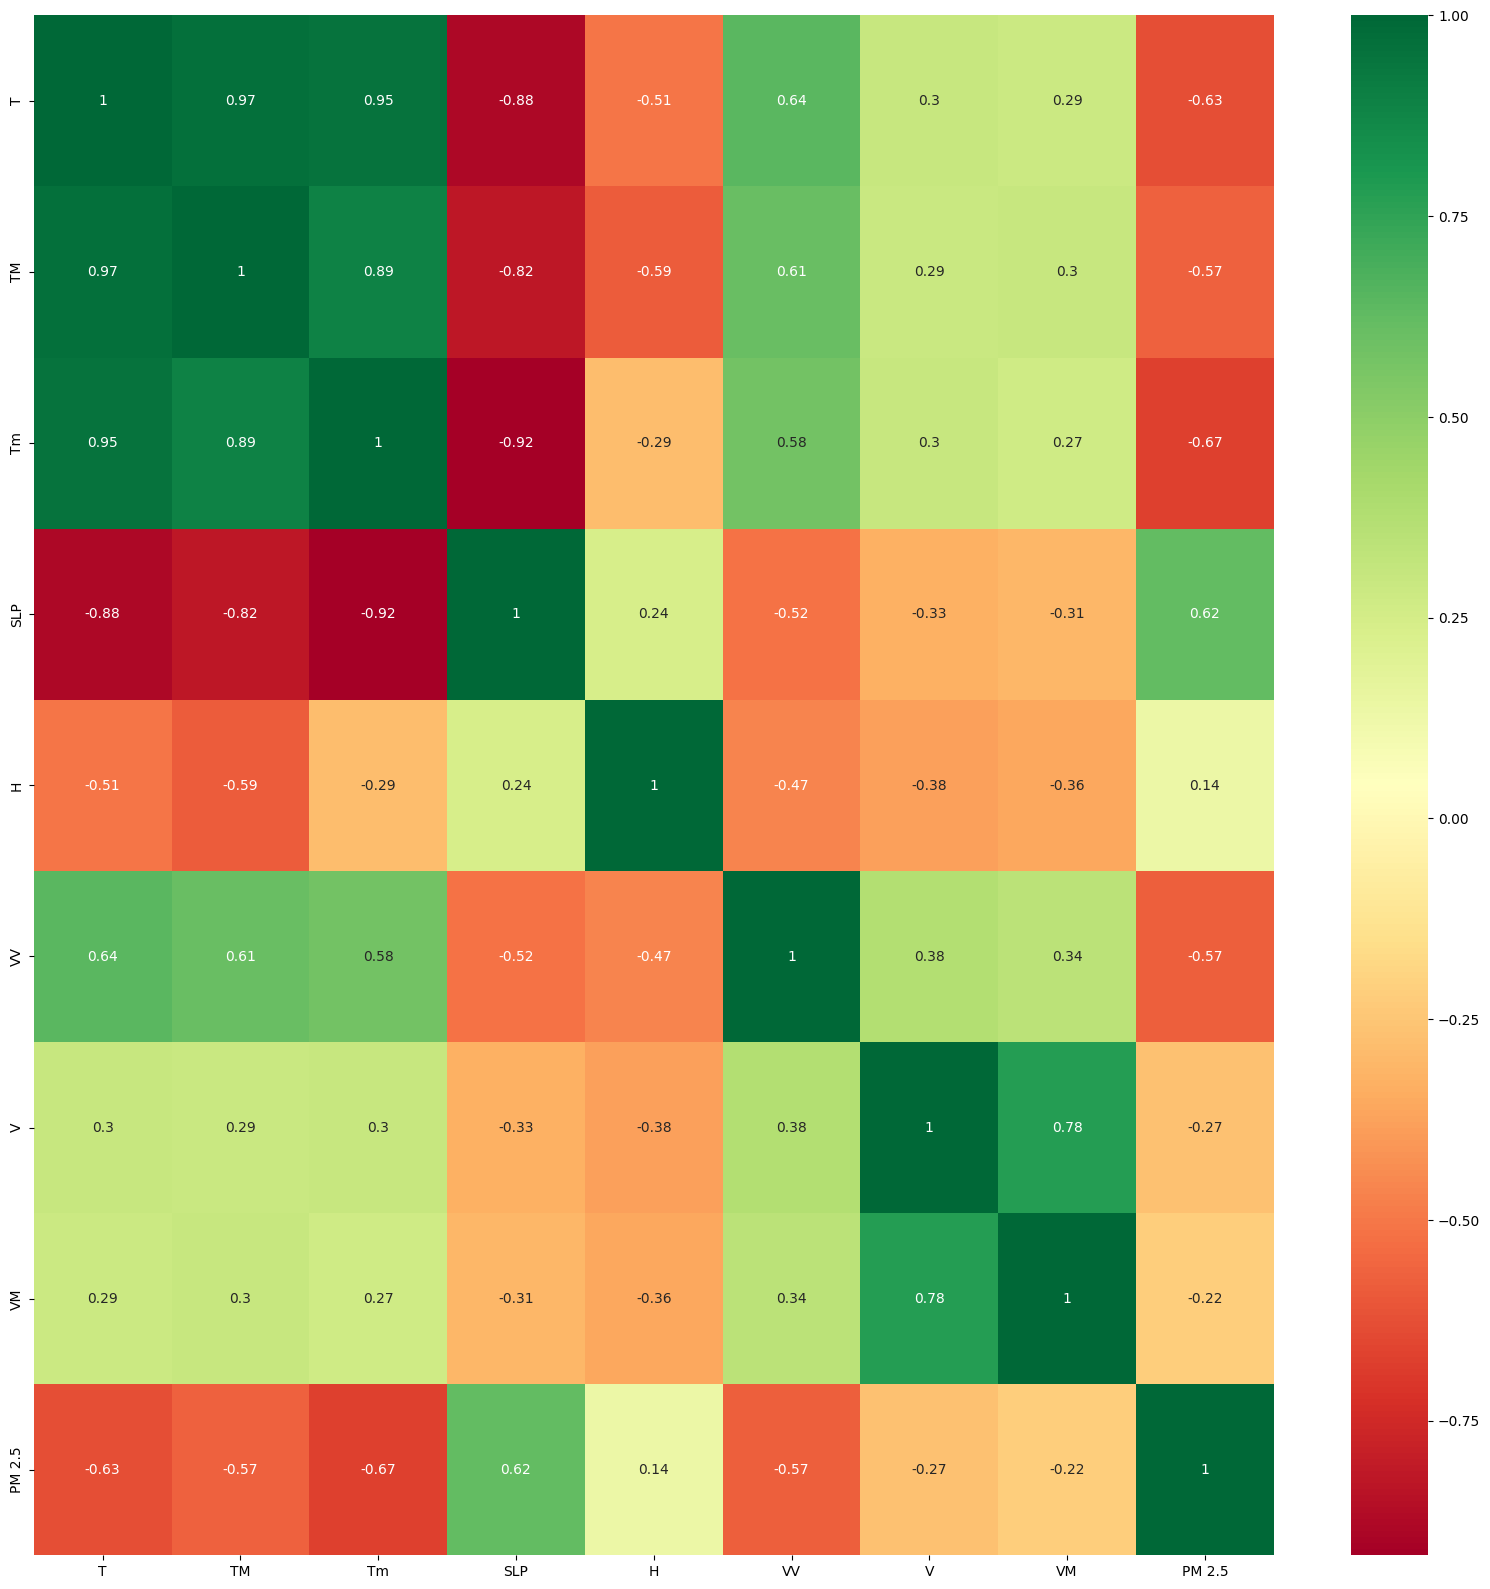

In [11]:
import seaborn as sns
#get corelation of each features in the dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [14]:
print(model.feature_importances_)


[0.20581594 0.0999185  0.22454105 0.10055347 0.08877565 0.18271469
 0.0543066  0.04337409]


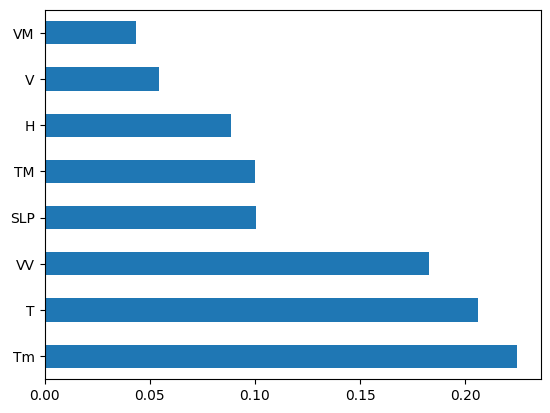

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<ipython-input-16-7657aee24f7e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: xlabel='PM 2.5', ylabel='Density'>

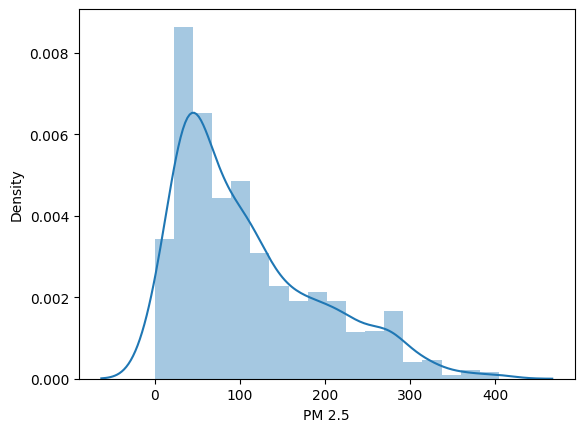

In [16]:
sns.distplot(Y)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [20]:
print("Coefficient of determination R^2 on train set: {}".format(regressor.score(X_train,Y_train)))

Coefficient of determination R^2 on train set: 0.551516808175875


In [21]:
print("Coefficient of determination R^2 on train set: {}".format(regressor.score(X_test,Y_test)))

Coefficient of determination R^2 on train set: 0.48525331308567876


In [23]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,Y,cv=5)

In [24]:
score.mean()

0.4710569304807393

In [30]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-2.690908
TM,0.462200
Tm,-3.867052
SLP,-0.044949
H,-1.211936
VV,-40.114908
V,-2.535633
VM,0.561482


In [31]:
prediction=regressor.predict(X_test)

<ipython-input-33-fd971ba3f33b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-prediction)


<Axes: xlabel='PM 2.5', ylabel='Density'>

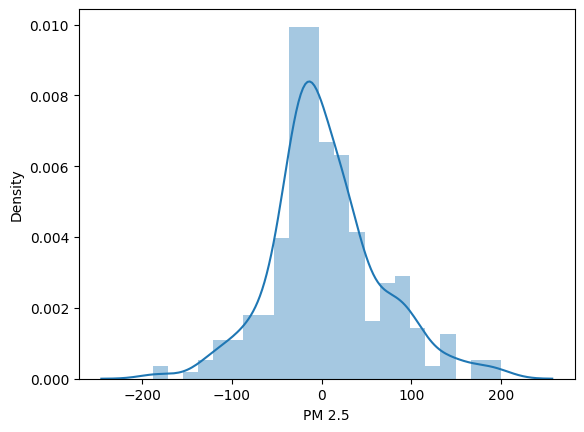

In [33]:
sns.distplot(Y_test-prediction)

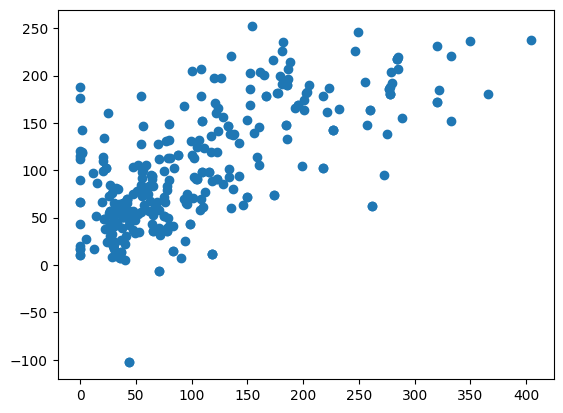

In [35]:
plt.scatter(Y_test,prediction)

In [36]:
from sklearn import metrics

In [37]:
print('MAE:',metrics.mean_absolute_error(Y_test,prediction))
print('MSE:',metrics.mean_squared_error(Y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

MAE: 44.83624126628639
MSE: 3687.5430309324192
RMSE: 60.725143317512384
